In [ ]:

cfg.train.lr = 5e-3 * sqrt(cfg.train.batch_size * ngpus_per_node / 2048) + 2e-3

In [3]:
from math import sqrt

lr = 5e-3 * sqrt(3 / 2048) + 2e-3
print(lr)

0.002191366386154936


In [8]:
import numpy as np
import torch
import torch.nn as nn
input = torch.randn((3,32,32))
target = torch.randn((3,32,32))
loss = nn.MSELoss()(input, target)
print(type(loss.item()))
print(loss.item())

print(np.mean([1,2,3]))


<class 'float'>
2.1398913860321045
2.0


In [75]:
import random
import pandas as pd
import numpy as np
import os
import cv2
import zipfile
from datetime import datetime

from model import create_model
from utils import save_checkpoint, seed_everything

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import KFold

from tqdm.auto import tqdm

import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

import torchvision.models as models
from torchvision import transforms

kf = KFold(n_splits=2)
df_train, df_test = pd.read_csv('./data/train.csv'), pd.read_csv('./data/test.csv')
    
for idxx, (train_idx, valid_idx) in enumerate(kf.split(df_train)):
        
    # print(f"---------- Starting FOLD : {idxx} / {config.N_FOLD} ----------")

    cs_train, cs_valid = df_train.iloc[train_idx], df_train.iloc[valid_idx]
    print(cs_train.iloc[0:3])
    print()
    cs_train.reset_index(inplace=True)
    cs_train.drop('index', axis = 1, inplace = True)
    cs_valid.reset_index(inplace=True)
    cs_valid.drop('index', axis = 1, inplace = True)
    print(cs_train.iloc[0:2])
    print()


                      LR                   HR
820  ./train/lr/0820.png  ./train/hr/0820.png
821  ./train/lr/0821.png  ./train/hr/0821.png
822  ./train/lr/0822.png  ./train/hr/0822.png

                      LR                   HR
820  ./train/lr/0820.png  ./train/hr/0820.png
821  ./train/lr/0821.png  ./train/hr/0821.png

                    LR                   HR
0  ./train/lr/0000.png  ./train/hr/0000.png
1  ./train/lr/0001.png  ./train/hr/0001.png
2  ./train/lr/0002.png  ./train/hr/0002.png

                    LR                   HR
0  ./train/lr/0000.png  ./train/hr/0000.png
1  ./train/lr/0001.png  ./train/hr/0001.png



In [84]:
df = pd.DataFrame(data=np.array([[1, 2, 3], [1, 5, 6], [7, 8, 9]]), columns=['A', 'B', 'C'])
print(df)
print()

df = df[1:3]
print(df)
print()

df.reset_index(inplace=True)
print(df)
print()

df.drop("index", axis=1, inplace=True)
print(df)
print()


   A  B  C
0  1  2  3
1  1  5  6
2  7  8  9

   A  B  C
1  1  5  6
2  7  8  9

   index  A  B  C
0      1  1  5  6
1      2  7  8  9

   A  B  C
0  1  5  6
1  7  8  9



In [70]:
from datetime import datetime
result_folder_name = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print(result_folder_name)

2022-09-08 04:44:54


In [58]:
import numpy as np

x = np.random.random((3,32,32))
print(x.shape)
print(x.transpose(1,2,0).shape)


(3, 32, 32)
(32, 32, 3)


<class 'numpy.ndarray'>
(2048, 2048, 3)


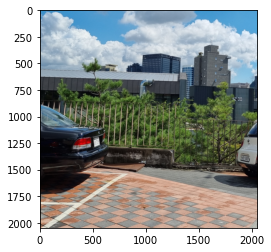

In [48]:
from skimage import io, color
import matplotlib.pyplot as plt

img = io.imread('/home/ljj0512/private/DACON-YangGae-hub/train/hr/0000.png')
print(type(img))
print(img.shape)
plt.imshow(img)
# cv2.imread('/home/ljj0512/private/DACON-YangGae-hub/train/hr')

<class 'numpy.ndarray'>
(512, 512, 3)


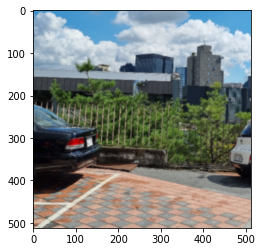

In [49]:
from skimage import io, color
import matplotlib.pyplot as plt

img = io.imread('/home/ljj0512/private/DACON-YangGae-hub/train/lr/0000.png')
print(type(img))
print(img.shape)
plt.imshow(img)

<class 'numpy.ndarray'>
(2048, 2048, 3)


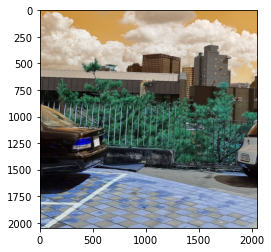

In [50]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/home/ljj0512/private/DACON-YangGae-hub/train/hr/0000.png')
print(type(img))
print(img.shape)
plt.imshow(img)
# cv2.imread('/home/ljj0512/private/DACON-YangGae-hub/train/hr')

In [1]:
import random
import pandas as pd
import numpy as np
import os
import cv2
import zipfile
import math

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

from tqdm.auto import tqdm

import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

import torchvision.models as models
from torchvision import transforms

import warnings
warnings.filterwarnings(action='ignore')

CFG = {
    'IMG_SIZE':2048,
    'EPOCHS':30,
    'LEARNING_RATE':1e-4,
    'BATCH_SIZE':12,
    'SEED':41
}

## Fixed RandomSeed
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(CFG['SEED']) # Seed 고정

In [2]:
train_df = pd.read_csv('../data/AI-yanggae-hub/train.csv')
test_df = pd.read_csv('../data/AI-yanggae-hub/test.csv')

In [ ]:
df = read_csv("./data/train.csv")

In [12]:
train_df

,LR,HR
0,./train/lr/0000.png,./train/hr/0000.png
1,./train/lr/0001.png,./train/hr/0001.png
2,./train/lr/0002.png,./train/hr/0002.png
3,./train/lr/0003.png,./train/hr/0003.png
4,./train/lr/0004.png,./train/hr/0004.png
...,...,...
1635,./train/lr/1635.png,./train/hr/1635.png
1636,./train/lr/1636.png,./train/hr/1636.png
1637,./train/lr/1637.png,./train/hr/1637.png
1638,./train/lr/1638.png,./train/hr/1638.png


In [19]:
test_df

,LR
0,./test/lr/20000.png
1,./test/lr/20001.png
2,./test/lr/20002.png
3,./test/lr/20003.png
4,./test/lr/20004.png
5,./test/lr/20005.png
6,./test/lr/20006.png
7,./test/lr/20007.png
8,./test/lr/20008.png
9,./test/lr/20009.png


In [59]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import cv2


class CustomDataset(Dataset):
    def __init__(self, df, transforms, train_mode):
        self.df = df
        self.transforms = transforms
        self.train_mode = train_mode

    def __getitem__(self, index):
        lr_path = self.df['LR'].iloc[index]
        lr_img = cv2.cvtColor(cv2.imread(lr_path), cv2.COLOR_BGR2RGB)
        lr_img = cv2.resize(lr_img, (2048, 2048), interpolation=cv2.INTER_CUBIC)
        if self.train_mode:
            hr_path = self.df['HR'].iloc[index]
            hr_img = cv2.cvtColor(cv2.imread(hr_path), cv2.COLOR_BGR2RGB)
            if transforms is not None:
                transformed = self.transforms(image=lr_img, label=hr_img)
                lr_img = transformed['image'] / 255.
                hr_img = transformed['label'] / 255.
            return lr_img, hr_img
        else:
            file_name = lr_path.split("/")[-1]
            if transforms is not None:
                transformed = self.transforms(image=lr_img)
                lr_img = transformed['image'] / 255.
            return lr_img, file_name
        
    def __len__(self):
        return len(self.df)

In [60]:
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2
def get_train_transform():
    return A.Compose(
        [ToTensorV2(p=1.0)],
        additional_targets={'image': 'image', 'label': 'image'}
    )

def get_test_transform():
    return A.Compose(
        [ToTensorV2(p=1.0)],
        additional_targets={'image': 'image', 'label': 'image'}
    )

In [61]:
import pandas as pd
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

train_dataset = CustomDataset(train_df, get_train_transform(), True)
train_loader = DataLoader(train_dataset, batch_size = 6, shuffle=False, num_workers=6)

test_dataset = CustomDataset(test_df, get_test_transform(), False)
test_loader = DataLoader(test_dataset, batch_size = 6, shuffle=False, num_workers=6)

In [54]:
print(type(train_dataset[0]))
print(len(train_dataset[0]))
print(train_dataset[0][0].shape)
print(train_dataset[0][1].shape)

<class 'tuple'>
2
torch.Size([3, 2048, 2048])
torch.Size([3, 2048, 2048])


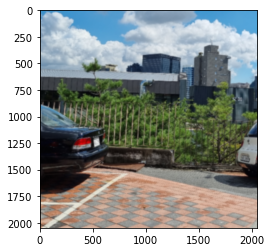

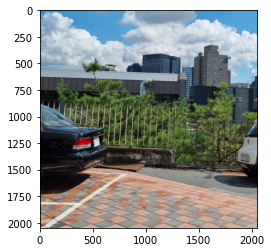

In [55]:
from skimage import io, color
import matplotlib.pyplot as plt


plt.imshow(train_dataset[0][0].permute((1,2,0)))
plt.show()

plt.imshow(train_dataset[0][1].permute((1,2,0)))
plt.show()

torch.Size([3, 2048, 2048])


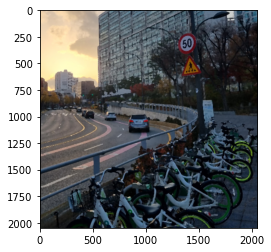

20000.png


In [62]:
from skimage import io, color
import matplotlib.pyplot as plt

print(test_dataset[0][0].shape)
plt.imshow(test_dataset[0][0].permute((1,2,0)))
plt.show()

print(test_dataset[0][1])

In [69]:
import cv2

img = test_dataset[0][0].numpy()
img = img.transpose(1,2,0)*255.
img = cv2.cvtColor(img.astype("uint8"), cv2.COLOR_BGR2RGB)

print(img.shape)
print(img[0,0])
cv2.imwrite("./submission/"+test_dataset[0][1], img)

(2048, 2048, 3)
[178 209 234]


True

<class 'numpy.ndarray'>
(512, 512, 3)


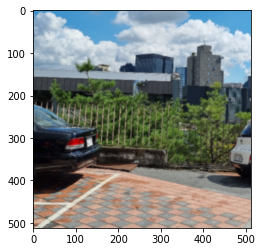

In [66]:
from skimage import io, color
import matplotlib.pyplot as plt

img = io.imread('/home/ljj0512/private/DACON-YangGae-hub/train/lr/0000.png')
print(type(img))
print(img.shape)
plt.imshow(img)

1
<class 'dict'>
torch.Size([3, 512, 512])


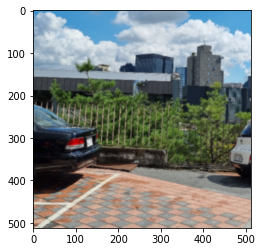

In [78]:
trans = get_train_transform()
trans_img = trans(image=img)
print(len(trans_img))
print(type(trans_img))
print(trans_img["image"].shape)
plt.imshow(trans_img["image"].permute((1,2,0)))

In [24]:
import matplotlib.pyplot as plt

print(type(train_dataset[0][0]))
print(len(train_dataset))
print(len(test_dataset))
# plt.imshow()

<class 'torch.Tensor'>
1640
18


torch.Size([3, 2048, 2048])


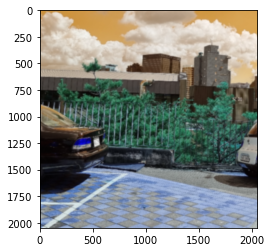

torch.Size([3, 2048, 2048])


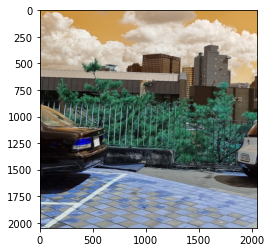

In [45]:
print(train_dataset[0][0].shape)
plt.imshow(train_dataset[0][0].permute((1,2,0)))
plt.show()

print(train_dataset[0][1].shape)
plt.imshow(train_dataset[0][1].permute((1,2,0)))
plt.show()

In [38]:
from tqdm.auto import tqdm

# item = [1,4,2,5,3]

# for i in iter(item):
#     print(i)

# for i in tqdm(iter(range(100))):
#     print(i)

# for i in enumerate(item):
#     print(i)

for i in tqdm(enumerate(range(100000))):
    a, b = i

0it [00:00, ?it/s]

In [61]:
import torch.nn as nn
import torch

x = torch.randn((5))
print(x)
print()

y = nn.ReLU(inplace=False)(x)
print(y)
print(x)
print()




x = torch.randn((5))
print(x)
print()

y = nn.ReLU(inplace=True)(x)
print(y)
print(x)


tensor([ 0.5788,  1.2689,  1.6010, -1.0119, -1.0582])

tensor([0.5788, 1.2689, 1.6010, 0.0000, 0.0000])
tensor([ 0.5788,  1.2689,  1.6010, -1.0119, -1.0582])

tensor([-0.5118, -1.0334, -0.2630,  0.5882,  1.1443])

tensor([0.0000, 0.0000, 0.0000, 0.5882, 1.1443])
tensor([0.0000, 0.0000, 0.0000, 0.5882, 1.1443])


In [95]:
class SRCNN(nn.Module):
    def __init__(self, num_channels=3, feature_dim=64, map_dim=32):
        super(SRCNN, self).__init__()
        # Feature extraction layer.
        self.features = nn.Sequential(
            nn.Conv2d(num_channels, feature_dim, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4)),
            nn.ReLU(True)
        )
        # out = (2048, 2048)

        # Non-linear mapping layer.
        self.map = nn.Sequential(
            nn.Conv2d(feature_dim, map_dim, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)),
            nn.ReLU(True)
        )
        # out = (2048, 2048)


        # Rebuild the layer.
        self.reconstruction = nn.Conv2d(map_dim, num_channels, (5, 5), (1, 1), (2, 2))
        # out = (2048, 2048)
        
        # Initialize model weights.

    def forward(self, x):
        out = self.features(x)
        out = self.map(out)
        out = self.reconstruction(out)
        return out

# for m in SRCNN().modules():
#     print(m)
#     print('='*100)

print(train_dataset[0][0].shape)
print(SRCNN()(train_dataset[0][0]).shape)

torch.Size([3, 2048, 2048])
torch.Size([3, 2048, 2048])
